In [2]:
library(tidyverse)
set.seed(123)

players_url <- "https://raw.githubusercontent.com/jw0220/individual_project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/jw0220/individual_project/refs/heads/main/sessions.csv"

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
players <- read_csv(players_url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
sessions <- read_csv(sessions_url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


**1) Sessions Dataset**
- 5 variables, 1535 observations

Variables:
- hashedEmail: Character, anonymized email address.
- start_time: Character, event start time in DD/MM/YYYY HH:MM format.
- end_time: Character, event end time in DD/MM/YYYY HH:MM format.
- original_start_time: Double, start time as Unix timestamp (seconds since 01/01/1970).
- original_end_time: Double, end time as Unix timestamp.

Data Issues:
- start_time and end_time are character strings, inefficient for time calculations.




**2) Players Dataset**
- 7 variables, 196 observations

Variables:
- experience: Character, user experience level.
- subscribe: Logical, indicates if the user has an active subscription (TRUE/FALSE).
- hashedEmail: Character, anonymized user email.
- played_hours: Double, total hours played by the user.
- name: Character, user's first name.
- gender: Character, user's gender.
- Age: Double, user's age in years.

Data Issue:
Age should be stored as an integer, not a double, as it is always a whole number.


**Questions**

Broad Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question: Can the user's amount of playtime and age predict whether they are subscribed to the game-related newsletter?

**Exploratory Data Analysis and Visualization**

In [5]:
player_select <- players |>
    select(subscribe, played_hours, Age)

player_select

# tidy format
players_tidy <- players |>
  mutate(
    Age = as.integer(Age),  
    played_hours = as.numeric(played_hours) 
  )

# Compute mean values for quantitative variables
mean_values <- players_tidy |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_Age = mean(Age, na.rm = TRUE)
  )

mean_values

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,17


mean_played_hours,mean_Age
<dbl>,<dbl>
5.845918,20.52062


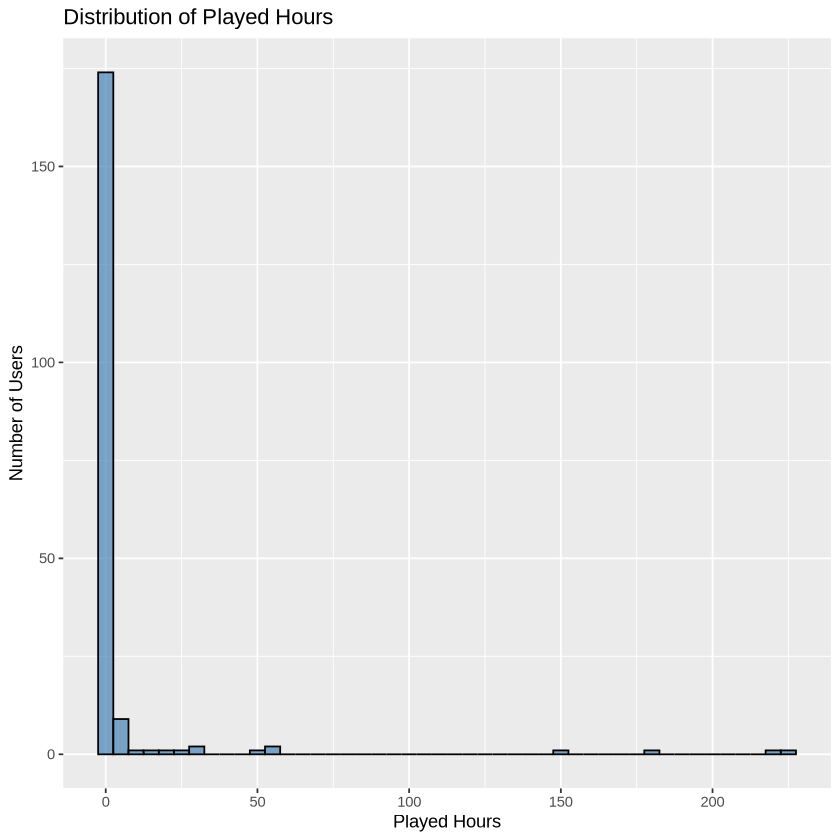

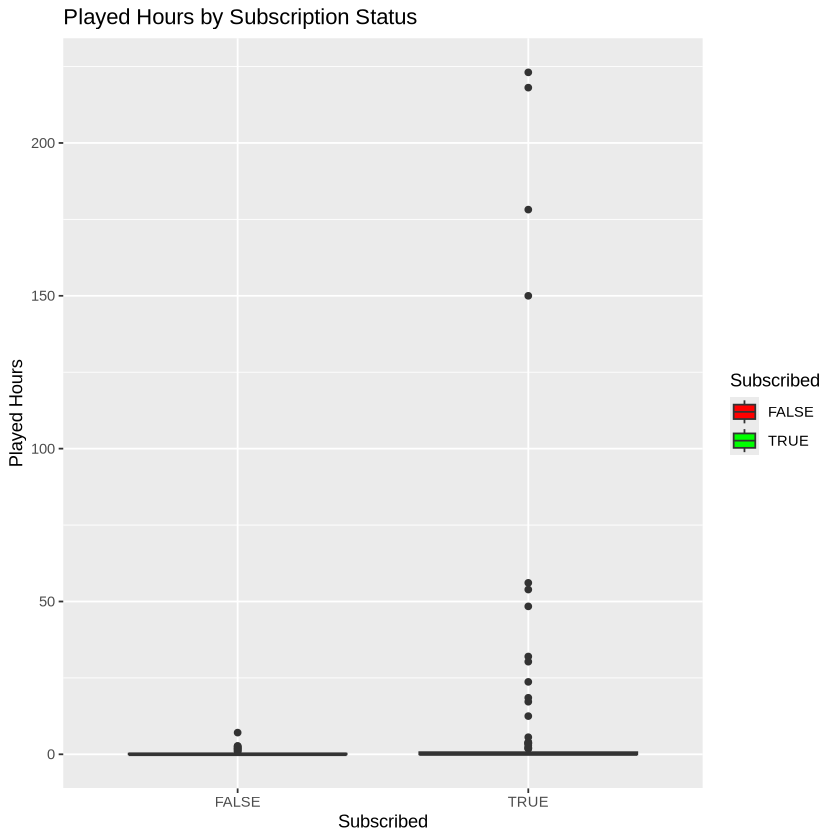

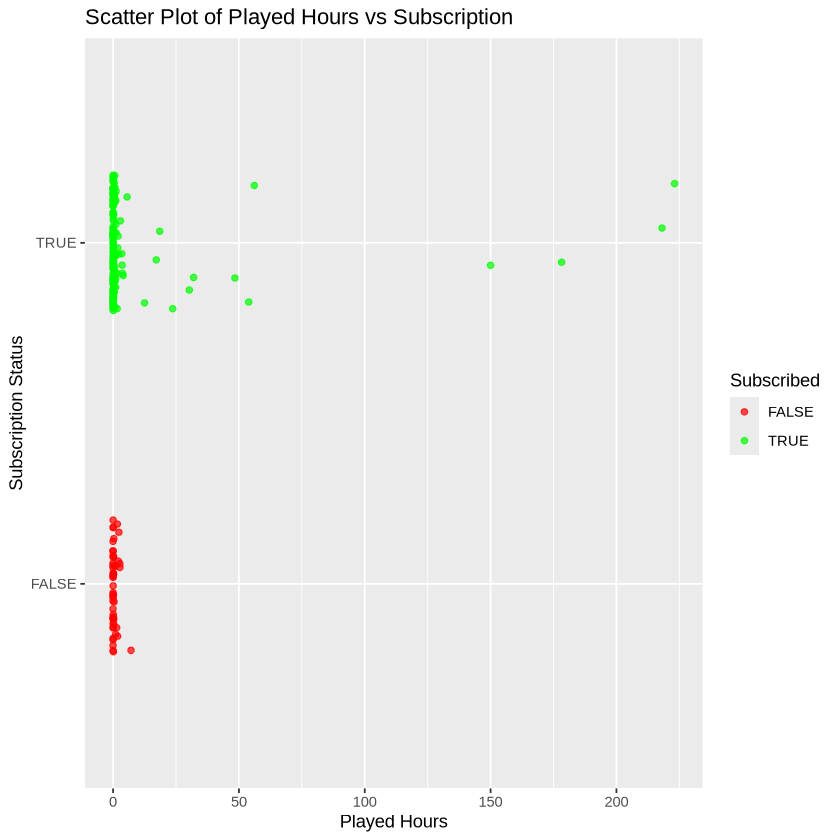

In [6]:
library(ggplot2)
library(dplyr)

# 1. Histogram of Played Hours  
played_hours_distribution <- ggplot(players, aes(x = played_hours)) +
                                  geom_histogram(binwidth = 5, fill = "steelblue", color = "black", alpha = 0.7) +
                                  labs(title = "Distribution of Played Hours", x = "Played Hours", y = "Number of Users") 
played_hours_distribution

# 2. Boxplot of Played Hours by Subscription Status  
played_hours_subscribe <- ggplot(players, aes(x = as.factor(subscribe), y = played_hours, fill = as.factor(subscribe))) +
                          geom_boxplot() +
                          labs(title = "Played Hours by Subscription Status", x = "Subscribed", y = "Played Hours") +
                          scale_fill_manual(values = c("FALSE" = "red", "TRUE" = "green"), name = "Subscribed") 
played_hours_subscribe

# 3. Scatter Plot with Subscription  
subscription_scattered <- ggplot(players, aes(x = played_hours, y = subscribe)) +
                          geom_jitter(aes(color = as.factor(subscribe)), height = 0.2, alpha = 0.7) +
                          labs(title = "Scatter Plot of Played Hours vs Subscription", x = "Played Hours", y = "Subscription Status") +
                          scale_color_manual(values = c("FALSE" = "red", "TRUE" = "green"), name = "Subscribed") 
subscription_scattered


- Histogram of Played Hours
    - The histogram shows a highly right-skewed distribution, meaning most users have very low played hours, while a few have significantly high values.

- Boxplot of Played Hours by Subscription Status
    - Users who are subscribed have more hours played.
    - There is more of a spread of hours played for users who are subscribed to the newsletter.
    - Outliers in played_hours could indicate highly engaged players who might bias the model.
      
- Scatter Plot (Jittered) with Subscription
    - For both subscribed and unsubscribed users, they both mostly have the same amount of hours played as there is a large concentration of points around the 0-10 hours range. However, for users who are subscribed, there are some big outliers with hours played past 150 hours. 


**Methods and Plan**

predition model: K-nearest neighbours 

Why is this method appropriate?
- KNN does not assume a specific distribution for the data, making it flexible for various relationships.
- KNN can capture non-linear relationships between played_hours and subscribe.

Assumptions Required for KNN
- Choosing the right k: If k is too small, the model can be overly sensitive to noise. If k is too large, it may over-smooth the decision boundary. We can tune k using cross-validation.
- Balanced classes: If the dataset has more non-subscribed users than subscribed ones, class imbalance could affect accuracy.

Limitations of KNN
- Computationally expensive: KNN requires storing the entire dataset and computing distances for every prediction. If the dataset is large, this can be slow.
- If too many features are used, distance calculations become less effective. However, since we are using only played_hours, this is less of a concern.

Model Selection and Evaluation Strategy
- Normalize played_hours to mean = 0 and standard deviation = 1
- Split the data into training and testing sets.
- Choose the best k using cross-validation.
- Train the KNN classifier and evaluate its performance.
